# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Suppress Pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [18]:
df = pd.read_csv("../data/states_edu.csv")
type(df)
df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [24]:
df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *Grade 4 Math*

How many years of data are logged in our dataset? 

In [20]:
df["YEAR"].nunique()

33

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [35]:
michAvg = df[df["STATE"] == "MICHIGAN"]["AVG_MATH_4_SCORE"].mean()
ohioAvg = df[df["STATE"] == "OHIO"]["AVG_MATH_4_SCORE"].mean()

if michAvg > ohioAvg:
    print("Michigan")
elif ohioAvg > michAvg:
    print("Ohio")
else:
    print("Same average")

Ohio


Find the average for your chosen test across all states in 2019

In [46]:
df[df["YEAR"] == 2019]["AVG_MATH_4_SCORE"].mean()

np.float64(239.9433962264151)

For each state, find a maximum value for your chosen test score

In [52]:
states = df["STATE"].unique()
for state in states:
    max = df[df["STATE"] == state]["AVG_MATH_4_SCORE"].mean()
    print(state, ":", max)


ALABAMA : 226.0909090909091
ARIZONA : 230.9090909090909
ARKANSAS : 231.54545454545453
CALIFORNIA : 227.9090909090909
COLORADO : 239.4
CONNECTICUT : 239.9090909090909
DELAWARE : 237.2
DISTRICT_OF_COLUMBIA : 216.54545454545453
FLORIDA : 238.8
GEORGIA : 232.54545454545453
HAWAII : 232.1818181818182
IDAHO : 237.0
INDIANA : 241.1818181818182
IOWA : 240.0909090909091
KENTUCKY : 233.63636363636363
LOUISIANA : 226.63636363636363
MAINE : 240.0
MARYLAND : 236.8181818181818
MASSACHUSETTS : 246.0
MICHIGAN : 234.36363636363637
MINNESOTA : 245.0
MISSISSIPPI : 226.27272727272728
MISSOURI : 236.0909090909091
NEBRASKA : 238.0
NEW_HAMPSHIRE : 246.3
NEW_JERSEY : 244.0
NEW_MEXICO : 226.27272727272728
NEW_YORK : 235.36363636363637
NORTH_CAROLINA : 238.9090909090909
NORTH_DAKOTA : 241.1818181818182
OHIO : 239.45454545454547
OKLAHOMA : 233.72727272727272
PENNSYLVANIA : 240.8
RHODE_ISLAND : 234.0909090909091
SOUTH_CAROLINA : 232.8181818181818
TENNESSEE : 231.54545454545453
TEXAS : 238.36363636363637
UTAH : 23

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [53]:
df["AVG_MATH_4_SCORE_PER_TOTAL_REV"] = df["AVG_MATH_4_SCORE"] / df["TOTAL_REVENUE"]

Feature engineering justification: **I included a column which calculates the average math 4 score per total revenue of each state for each exam year to help gauge how the grade 4 scores vary depending on state revenue (financial status)**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '4th Grade Reading Score')

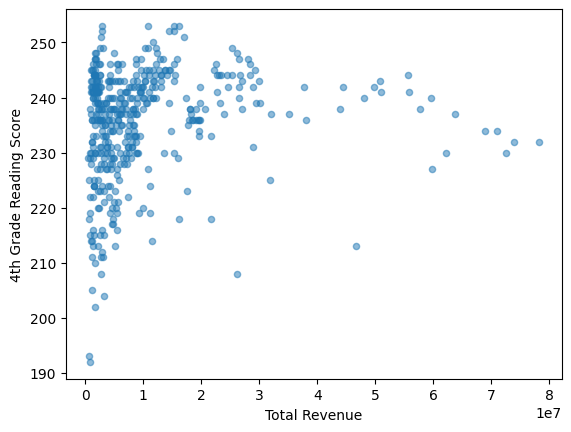

In [61]:
df.plot.scatter(x='TOTAL_REVENUE', y='AVG_MATH_4_SCORE', alpha=0.5)
plt.xlabel('Total Revenue')
plt.ylabel('4th Grade Reading Score')

**Scatterplot of 4th Grade Math score by total revenue**

**Visualization 2**

Text(0, 0.5, '4th Grade Math Score')

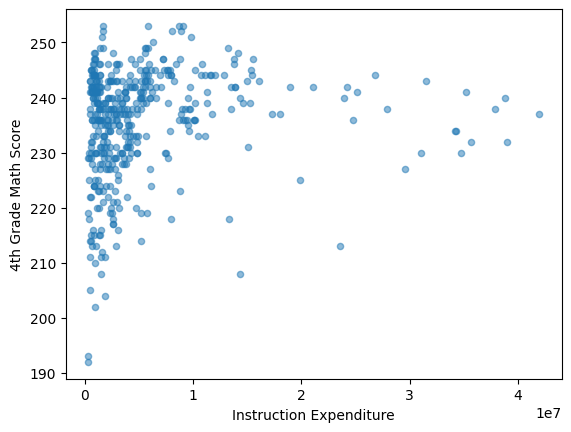

In [60]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE', y='AVG_MATH_4_SCORE', alpha=0.5)
plt.xlabel('Instruction Expenditure')
plt.ylabel('4th Grade Math Score')

**Scatterplot of 4th grade math score by instruction expenditure**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [63]:
from sklearn.model_selection import train_test_split

In [99]:
# X =
# y = 
X = df[['GRADES_4_G','AVG_MATH_8_SCORE','AVG_READING_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']
y.fillna(y.median(), inplace = True)

In [87]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [102]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [103]:
# create your model here
model = LinearRegression()

In [104]:
model.fit(X_train, y_train)

LinearRegression()

In [105]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [106]:
np.mean(model.predict(X_test)-y_test)
model.score(X_test, y_test)


0.8470185368226937

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

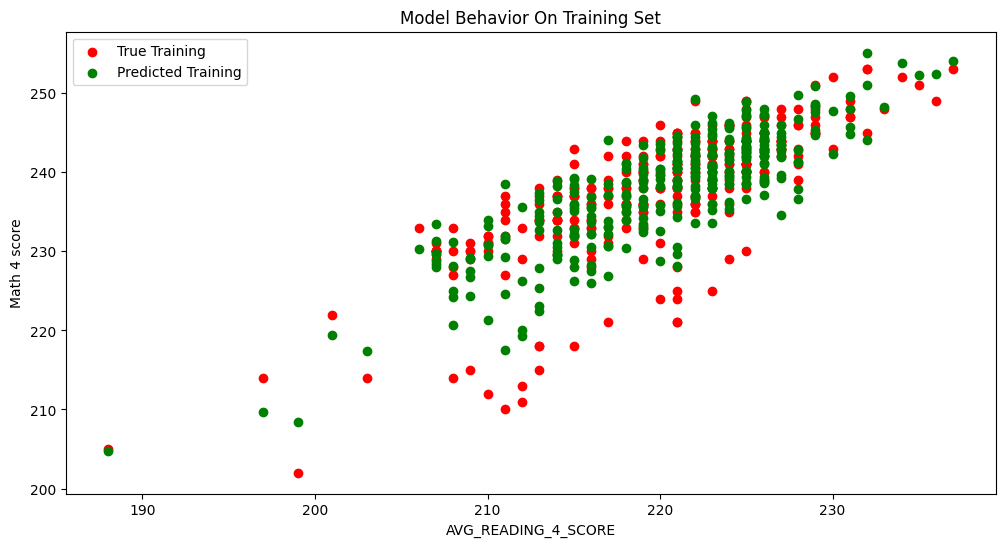

In [107]:
col_name = 'AVG_READING_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 4 score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior On Training Set')

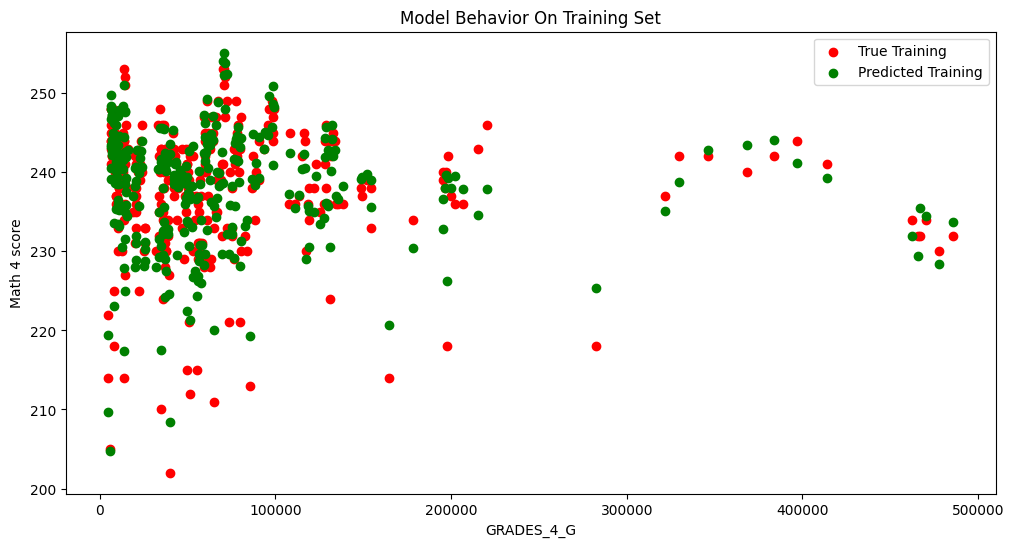

In [109]:
col_name = 'GRADES_4_G'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 4 score')
plt.title("Model Behavior On Training Set")